In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
m830 = pd.read_excel("./M_yeastGEM_v8__46__3__46__0_sub_use.xlsx", engine='openpyxl')
m900 = pd.read_excel("./yeastGEM_develop_sub_use.xlsx", engine='openpyxl')
dataset = pd.read_table("./Biolog_Substrate.tsv")

In [5]:
m830.head(3)

,Unnamed: 0,Name_in_Model,id,Substrate_type,Growth_Biolog,Growth_Model
0,0,(S)-lactate,s_0065[m],C,G,G
1,1,(S)-malate,s_0069[p],C,NG,G
2,2,2'-deoxyadenosine,s_0133[e],C,NG,G


In [13]:
def source(data, s):
    new_data = pd.DataFrame(columns=data.columns)
    for i in data.index:
        if data.loc[i, 'Substrate_type'] == s:
            new_data.loc[i, :] = data.loc[i, :]
    return new_data


def check_growth(data):
    c = [data.loc[i, 'Growth_Biolog'] == data.loc[i, 'Growth_Model'] for i in data.index]
    return np.sum(c)

In model m830, true prediction using C is 28
In model m830, true prediction using N is 48
In model m830, true prediction using P is 20
In model m830, true prediction using S is 10
In model m900, true prediction using C is 29
In model m900, true prediction using N is 49
In model m900, true prediction using P is 40
In model m900, true prediction using S is 9


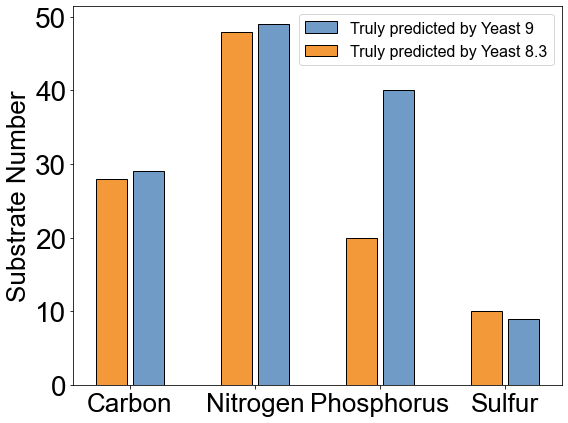

In [15]:
cover8 = []
cover9 = []
true8 = []
true9 = []
for s in ['C', 'N', 'P', 'S']:
    new_data = source(m830, s)
    ct = check_growth(new_data)
    cover = len(new_data.index)
    cover8.append(cover)
    true8.append(ct)
    print('In model m830, true prediction using {} is {}'.format(s, ct))
for s in ['C', 'N', 'P', 'S']:
    new_data = source(m900, s)
    ct = check_growth(new_data)
    cover = len(new_data.index)
    cover9.append(cover)
    true9.append(ct)
    print('In model m900, true prediction using {} is {}'.format(s, ct))
c = n = p = s = 0
for da in dataset.index:
    if dataset.loc[da, 'Substrate_type'] == 'C':
        c += 1
    elif dataset.loc[da, 'Substrate_type'] == 'N':
        n += 1
    elif dataset.loc[da, 'Substrate_type'] == 'P':
        p += 1
    elif dataset.loc[da, 'Substrate_type'] == 'S':
        s += 1
whole = [c, n, p, s]

################################################################、
# figure

sou = ['C', 'N', 'P', 'S']
barWidth = 0.25
r1 = np.arange(len(sou))
r2 = [x + 1.2*barWidth for x in r1]
r3 = [x + barWidth for x in r2]
bottom9 = []
for i in range(len(true9)):
        sum = true9[i] + cover9[i]
        bottom9.append(sum)
bottom8 = []
for i in range(len(true9)):
        sum = true8[i] + cover8[i]
        bottom8.append(sum)
plt.figure(figsize=(8, 6))
plt.axes().set_facecolor('white')
# plt.bar(r1, true9, width=barWidth, color='#6f9bc6', edgecolor='Black', label='Truly predicted by Yeast 9')
# plt.bar(r2, true8, width=barWidth, color='#f3993a', edgecolor='Black', label='Truly predicted by Yeast 8.3')
plt.bar(r2, true9, width=barWidth, color='#6f9bc6', edgecolor='Black', label='Truly predicted by Yeast 9')
plt.bar(r1, true8, width=barWidth, color='#f3993a', edgecolor='Black', label='Truly predicted by Yeast 8.3')

# plt.bar(r1, cover9, width=barWidth, bottom=true9, color='#a4d4b0', edgecolor='white', label='substrates coverd by Yeast9')
# plt.bar(r2, cover8, width=barWidth, bottom=true8, color='#f6b683', edgecolor='white', label='substrates coverd by Yeast8')
#
# plt.bar(r3, whole, width=barWidth, color='#ddedd7', edgecolor='white', label='whole dataset')
font2 = {'family': 'Arial',
            'weight': 'normal',
            'size': 26,
            }
font3 = {'family': 'Arial',
            'weight': 'normal',
            'size': 16,
            }

plt.ylabel('Substrate Number', fontdict=font2)
plt.xticks([r + 1.2 *barWidth/2 for r in range(len(sou))],
            ['Carbon', 'Nitrogen', 'Phosphorus', 'Sulfur'],
            fontproperties='Arial', size=26)
plt.yticks(np.arange(0, 55, 10), fontproperties='Arial', size=28)
plt.tick_params(top=False, bottom=True, left=True, right=False)
plt.legend(prop=font3)
plt.tight_layout()
plt.savefig('sub_use.tif', dpi=600)
plt.show()


In [12]:
!pip uninstall xlrd

^C


In [ ]:
!conda list

# packages in environment at C:\Users\13293\AppData\Local\conda\conda\envs\yeastGEM:
#
# Name                    Version                   Build  Channel
backcall                  0.2.0              pyhd3eb1b0_0  
certifi                   2021.5.30        py36haa95532_0  
colorama                  0.4.4              pyhd3eb1b0_0  
cycler                    0.11.0                    <pip>
decorator                 5.1.1              pyhd3eb1b0_0  
entrypoints               0.3                      py36_0  
et-xmlfile                1.1.0                     <pip>
ipykernel                 5.3.4            py36h5ca1d4c_0  
ipython                   7.16.1           py36h5ca1d4c_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
jedi                      0.17.0                   py36_0  
jupyter_client            7.1.2              pyhd3eb1b0_0  
jupyter_core              4.8.1            py36haa95532_0  
kiwisolver                1.3.1                     <pip>
matplotlib  